# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 3 - Credit Risk Prediction </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://hm-ai.github.io/MLF/">
    <img src="https://drive.google.com/uc?export=view&id=1gmxxmwCR1WXK0IYtNqvE4QXFleznWqQO" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/15YExFNEfuDHNko09eEeVruE9el_Tnj2_?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
# Access files from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Outline 

- [Exploring the dataset](#Exploring-the-dataset)
  - [Loading the dataset](#Loading-the-dataset)
  - [Adding a new categorical feature](#Adding-a-new-categorical-feature)
- [Visualization](#Visualization)
  - [Count plot for a categorical variable](#Count-plot-for-a-categorical-variable)
  - [Numerical variable distribution](#Numerical-variable-distribution)
  - [Boxplots](#Boxplots)
- [Preprocessing the data](#Preprocessing-the-data)
  - [Preprocessing categorical variables](#Preprocessing-categorical-variables)
  - [Preprocessing numerical variables](#Preprocessing-numerical-variables)
- [Finetuning a Supervised Model](#Finetuning-a-Supervised-Model)
  - [Evaluation Metrics](#Evaluation-Metrics)
  - [Fine Tuning Random Forest](#Fine-Tuning-Random-Forest)
- [Adjusting the threshold](#Adjusting-the-threshold)
  - [A small review](#A-small-review)
  - [Adjusting the probability threshold](#Adjusting-the-probability-threshold)

# 1. Exploring the dataset

* In this dataset, each entry represents a person who takes a credit by a bank. 

* The target is: **loan_status** (0 or 1) 
  * 1 in case of default.
  * 0 otherwise.
* It is a **binary classification problem**. 

* The dataset is **highly imbalanced**.

* We would like to map the following features to the binary target. 
  * **person_age** (numerical) refers to the age.
  *   **person_income** (numerical) refers to the annual income.
  *   **person_home_ownership** (categorical: 'MORTGAGE', 'RENT', 'OWN', 'OTHER').
  *   **person_emp_length** (numerical) refers to the employment length (in years). 
  *   **loan_intent** (categorical: 'VENTURE', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'EDUCATION', 'PERSONAL') refers to the loan purpose.
  *   **loan_grade** (categorical: 'A', 'C', 'D', 'B', 'E', 'F','G').
  *   **loan_amnt** (numerical) refers to the loan amount.
  *   **loan_int_rate** (numerical) refers to the loan interest rate.
  *   **loan_percent_income** (numerical).
  *   **cb_person_default_on_file** (categorical: 'N', 'Y') refers to the historical default.
  *   **cb_person_cred_hist_length** (numerical) refers to the credit history length. 

### 1.1 Loading the dataset

---
<font color=green>Q1:</font>
<br><font color='green'>
Import the basic libraries `pandas`, `numpy`, `seaborn`, `matplotlib`, `os` and `sklearn`
</font>

---


---
<font color=green>Q2:</font>
<br><font color='green'>
Using `os.chdir(<path>)`, specify the path to your working directory 
</font>

---


In [ ]:
# Specify the path to your working directory
os.chdir("./gdrive/My Drive/Teaching/Imperial_College/Colab Notebooks/Programming_Session_3/")

---
<font color=green>Q3:</font>
<br><font color='green'>
Using `pd.read_csv()`, load the dataset and name it `df`. 
</font>

---


---
<font color=green>Q4:</font>
<br><font color='green'>
Shuffle the rows of the dataset.
</font>

---

---
<font color=green>Q5:</font>
<br><font color='green'>
Display the 5 first rows of the dataset `df`.
</font>

---

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,24,10800,RENT,8.0,VENTURE,A,5000,7.88,1,0.46,N,2
1,25,65499,RENT,9.0,VENTURE,C,4000,12.23,0,0.06,N,4
2,28,24000,RENT,0.0,PERSONAL,C,10000,12.87,1,0.42,Y,10
3,28,18000,RENT,0.0,PERSONAL,C,1000,13.49,1,0.06,N,8
4,24,50000,RENT,8.0,DEBTCONSOLIDATION,B,7000,11.71,0,0.14,N,3


---
<font color=green>Q6:</font>
<br><font color='green'>
Display the 5 last rows of the dataset `df`.
</font>

---

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,24,98000,MORTGAGE,8.0,VENTURE,A,10000,6.62,0,0.10,N,3
32577,23,30000,RENT,0.0,MEDICAL,A,3000,5.79,0,0.10,N,3
32578,23,20400,RENT,5.0,VENTURE,D,5500,10.99,0,0.27,Y,2
32579,23,66000,RENT,1.0,EDUCATION,C,14000,12.99,0,0.21,N,3
32580,25,85000,MORTGAGE,5.0,EDUCATION,C,9600,13.85,0,0.11,N,2


---
<font color=green>Q7:</font>
<br><font color='green'>
Using `df.info()`, answer the following questions: 
  * How many rows do we have in the dataset ?
  * Do we have missing values ? 
</font>

---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


---
<font color=green>Q8:</font>
<br><font color='green'>
Create a list of the categorical variables named `catvars` and a list of numerical variables named `numvars`. 
</font>

---

In [ ]:
#create quickaccess list with categorical variables labels

#create quickaccess list with numerical variables labels


---
<font color=green>Q9:</font>
<br><font color='green'>
Split your dataset into the training set (70% of the data) called `df_train` and the test set (30% of the data) named `df_test`, as described in the figure below.
</font>

---

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1ZbYtw7eU6KdGkIhLUfwsYFZWPMg61jer"></center>

In [ ]:
# Threshold

# Splitting the dataset


We have 22807 training samples
We have 9774 testing samples


### 1.2 Adding a new categorical feature

---
<font color=green>Q10:</font>
<br><font color='green'>
Show the sub-dataframe containing the numerical variables. 
</font>

---

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,24,10800,8.0,5000,7.88,0.46,2
1,25,65499,9.0,4000,12.23,0.06,4
2,28,24000,0.0,10000,12.87,0.42,10
3,28,18000,0.0,1000,13.49,0.06,8
4,24,50000,8.0,7000,11.71,0.14,3
...,...,...,...,...,...,...,...
22802,27,57600,4.0,3000,12.99,0.05,10
22803,23,55000,5.0,3600,5.99,0.07,3
22804,23,55000,1.0,8000,5.42,0.15,4
22805,35,130000,3.0,9000,12.73,0.07,8


---
<font color=green>Q11:</font>
<br><font color='green'>
Using `df.describe()`, describe the distribution of the numerical features. 
</font>

---

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,22807.000000,2.280700e+04,22807.000000,22807.000000,22807.000000,22807.000000,22807.000000
mean,27.726312,6.582073e+04,4.740957,9566.035647,11.018712,0.170077,5.800018
std,6.386475,6.403423e+04,4.036380,6310.133543,3.083560,0.106820,4.063217
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.848700e+04,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12000.000000,13.110000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


count    2.280700e+04
mean     6.582073e+04
std      6.403423e+04
min      4.000000e+03
25%      3.848700e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: person_income, dtype: float64

---
<font color=green>Q12:</font>
<br><font color='green'>
Create a new categorical feature named `category_income` assigning a category 'A', 'B', 'C' and 'D' according to the feature `person_income` as follows:
  * If `person_income` is in [0, 39000], then `category_income = 'D'`.
  * If `person_income` is in [39000, 55000], then `category_income = 'C'`.
  * If `person_income` is in [55000, 79000], then `category_income = 'B'`.
  * If `person_income` is in [79000, +$\infty$], then `category_income = 'A'`.
</font>

---

In [ ]:
# Age intervals

# Categories

# Create the new feature


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,category_income
0,24,10800,RENT,8.0,VENTURE,A,5000,7.88,1,0.46,N,2,D
1,25,65499,RENT,9.0,VENTURE,C,4000,12.23,0,0.06,N,4,B
2,28,24000,RENT,0.0,PERSONAL,C,10000,12.87,1,0.42,Y,10,D
3,28,18000,RENT,0.0,PERSONAL,C,1000,13.49,1,0.06,N,8,D
4,24,50000,RENT,8.0,DEBTCONSOLIDATION,B,7000,11.71,0,0.14,N,3,C
5,33,63550,RENT,6.0,MEDICAL,A,6000,10.99,0,0.09,N,8,B
6,31,30000,MORTGAGE,3.0,PERSONAL,A,9450,8.49,0,0.32,N,8,D
7,25,24000,RENT,3.0,DEBTCONSOLIDATION,C,6250,13.72,0,0.26,Y,3,D
8,32,25800,MORTGAGE,0.0,VENTURE,D,2400,14.96,0,0.09,N,6,D
9,25,42000,RENT,2.0,EDUCATION,C,20000,13.47,1,0.48,N,4,C


---
<font color=green>Q13:</font>
<br><font color='green'>
Add the new category `category_income` to the list of categorical variables `catvars`.
</font>

---

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'category_income']

# 2. Visualization

### 2.1 Count plot for a categorical variable. 

A **count plot** can be thought of as a histogram across a categorical variable. It shows the counts of observations in each category using bars.



---
<font color=green>Q14:</font>
<br><font color='green'>
Using `seaborn.countplot`, display the **count plot** of the categorical variable `'person_home_ownership'` (where you separate the counts according to the targets 0/1).
</font>

---

In [ ]:
# The different values of person_home_ownsership


array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

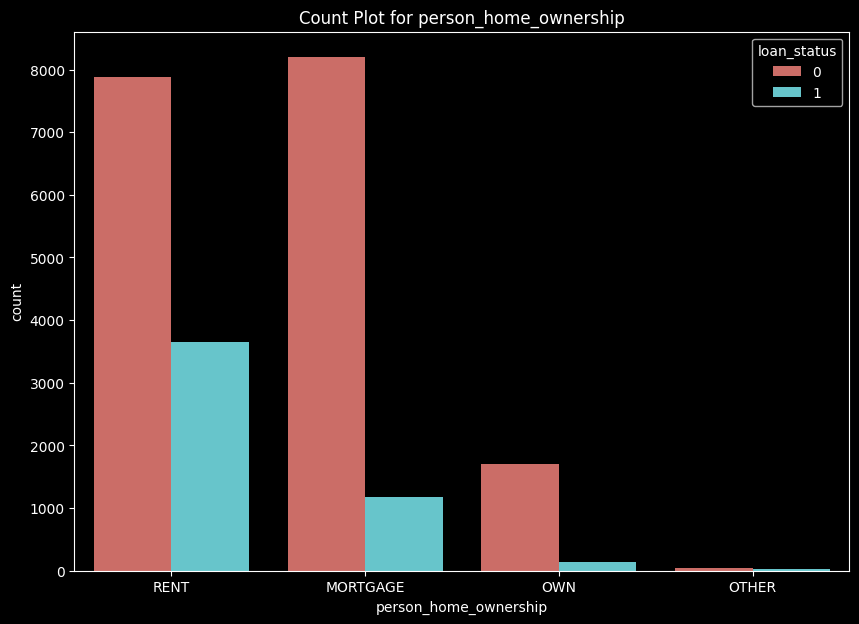

### 2.2 Numerical variable distribution

We want to plot a univariate distribution of a numerical variable associated to the "0" and "1" targets. 

---
<font color=green>Q15:</font>
<br><font color='green'>
Using `seaborn.distplot`, display the distribution of the `person_income` numerical variable for the "0" and "1" targets. 
</font>

---

---
<font color=green>Q16:</font>
<br><font color='green'>
What can you say about these distributions ? 
</font>

---

---
We can see that the distribution of `person_income` associated the target '0' (No default) is shifted to the right, in comparison with the one associated with the target '1' (default).

---

### 2.3 Boxplots 

Now, we want to show the distribution of a numerical variable for all the values of a categorical variable.

To that end, we use box plots:

Boxplots display the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

* **median (Q2/50th Percentile)**: the middle value of the dataset.
* **first quartile (Q1/25th Percentile)**: the middle number between the smallest number (not the “minimum”) and the median of the dataset.
* **third quartile (Q3/75th Percentile)**: the middle value between the median and the highest value (not the “maximum”) of the dataset.
* **interquartile range (IQR)**: 25th to the 75th percentile.
* **whiskers** (shown in blue)
* **outliers** (shown as green circles)
* **maximum**: Q3 + 1.5*IQR
* **minimum**: Q1 -1.5*IQR 

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1g3G3I6msJQ4iNXUUr_Z5cZAji14Dj5lk"></center>


---
<font color=green>Q17:</font>
<br><font color='green'>
Using `seaborn.boxplot`, describe the distribution of the numerical feature `loan_amnt` according to the new categorical variable `category_income` and the targets `loan_status`. 
</font>

---

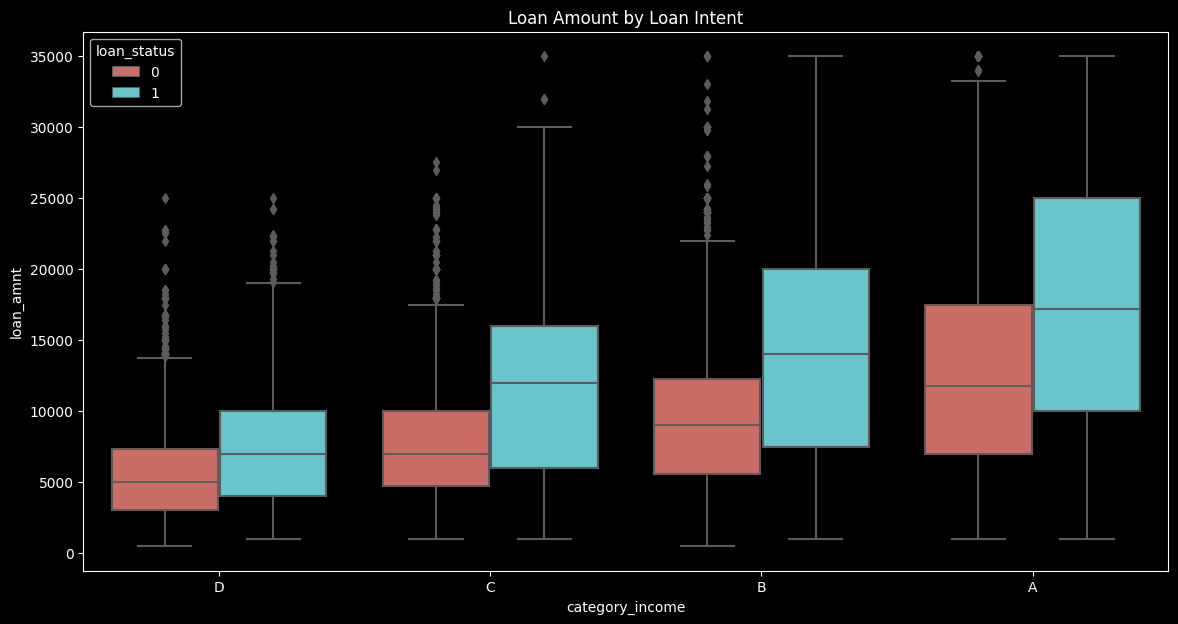

# 3. Preprocessing the data

### 3.1. Preprocessing categorical variables 

* Let's suppose we have a categorical variable X that can take K different values $\{1, \dots, K\}$

* **One hot encoding** a category consists in transforming the category into a vector $\in \mathbb{R}^K$ where we have 1 in the position of the category and zeros elswhere. 

* For instance, if $K=4$, the category "3" for one sample is one hot encoded into the vector $[0, 0, 1, 0]$


* Therefore, we can turn a catogorical feature into K features. 

* As each sample is only mapped to one category, the K features are not independent (the K-th feature can be deduced from the K-1 first features). Therefore, we usually drop one of the columns.

<center><img width="800" src = "https://drive.google.com/uc?export=view&id=1-WOjGo6OFQ0Cuq4mAmZ8oh6T2D6Y1gVL"></center>

---
<font color=green>Q18:</font>
<br><font color='green'>
For each categorical variable, pring the names of the different categories and their number.
</font>

---

The categories:

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'category_income']

Feature: person_home_ownership ... Categories: ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
Feature: loan_intent ... Categories: ['VENTURE' 'PERSONAL' 'DEBTCONSOLIDATION' 'MEDICAL' 'EDUCATION'
 'HOMEIMPROVEMENT']
Feature: loan_grade ... Categories: ['A' 'C' 'B' 'D' 'E' 'F' 'G']
Feature: cb_person_default_on_file ... Categories: ['N' 'Y']
Feature: category_income ... Categories: ['D', 'B', 'C', 'A']
Categories (4, object): ['D' < 'C' < 'B' < 'A']


The number of categories:

---
<font color=green>Q19:</font>
<br><font color='green'>
For each of the categorical variables, what is the number of possible values ?
</font>

---

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
category_income              4
dtype: int64

---
<font color=green>Q20:</font>
<br><font color='green'>
Print the shape of `df_train` before One Hot Encoding.
</font>

---

In [ ]:
# 1 for target (loan_status)
# 5 categorical variables
# 7 numerical variables 


(22807, 13)

---
<font color=green>Q21:</font>
<br><font color='green'>
Using `pandas.get_dummies` or `sklearn.preprocessing.OneHotEncoder`, transform each categorical variable (with K categories) into K-1 new feature columns.
</font>

---

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'category_income']

---
<font color=green>Q22:</font>
<br><font color='green'>
Explain the new shape of `df_train` after the one hot encoding ?
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1eEOIb904c2UOT82AUYdjaZINj9rVr1Ji"></center>

(22807, 26)

---
* Number of Dummy variables: 18.
  * person_home_ownership     ---->   4 possible values ----> 3 Dummy variables 
  * loan_intent               ---->   6 possible values ----> 5 Dummy variables
  * loan_grade                ---->   7 possible values ----> 6 Dummy variables
  * cb_person_default_on_file ---->   2 possible values ----> 1 Dummy variable
  * category_income           ---->   4 possible values ----> 3 Dummy variables

* Number of Numerical variables: 7. 

* One column for the target `loan_status`. 

* Total number of columns: 26
---

### 3.2 Preprocessing Numerical Variables

---
<font color=green>Q23:</font>
<br><font color='green'>
Split `df_train` into `df_train_features` and `df_train_targets` and `df_test` into `df_test_features` and `df_test_targets` as shown in the figure below.
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1V0Sjgbbef6mdNSAwKAUQLeJlOWJU-3np"></center>

---
<font color=green>Q24:</font>
<br><font color='green'>
Split each of `df_train_features` and `df_test_features` as shown in the figure below:

* `df_train_features_numvars` and `df_test_features_numvars` containing the training abd testing numerical features
* `df_train_features_rest` and `df_train_features_rest` containing the rest of the features.
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1loF_Uk967CSVlGKikXWbDxwpKAEGaDlg"></center>

---
<font color=green>Q25:</font>
<br><font color='green'>
Plot the histograms of the numerical variables `df_train_features_numvars` using `dataframe.hist()`
</font>

---

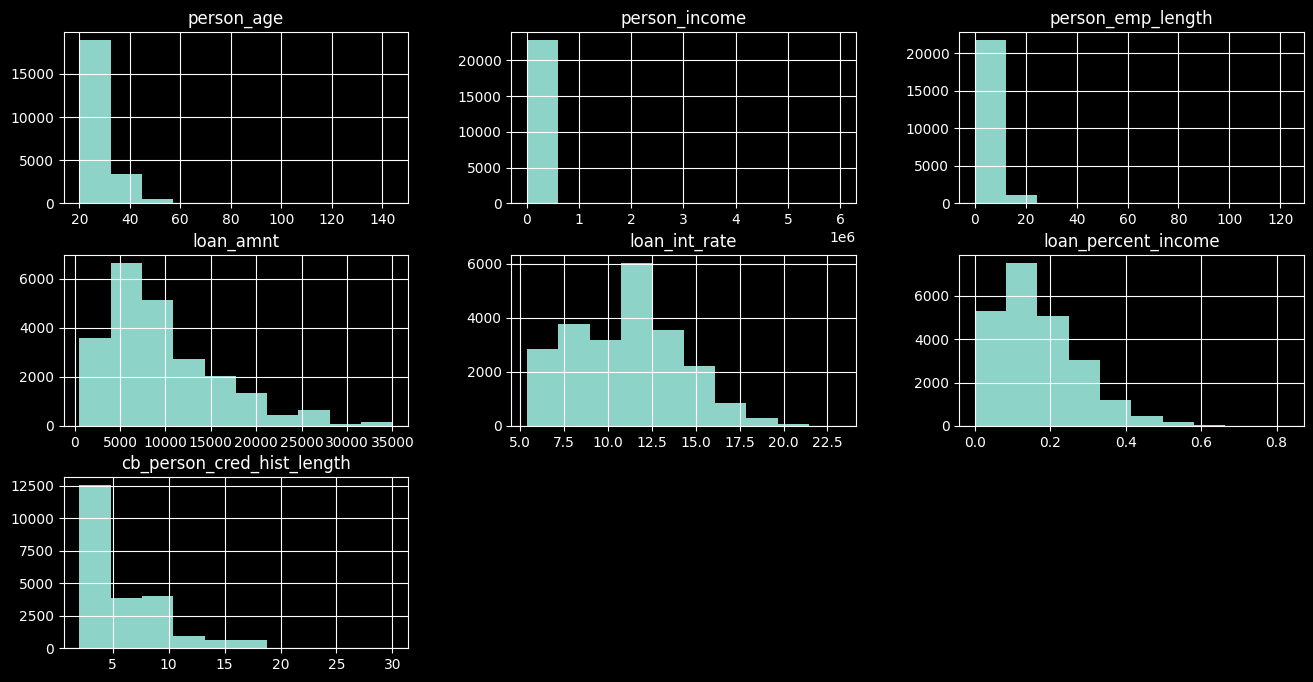

There are two ways of scaling a numerical variable:

<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1UiUAyNligNF9TQkavRdatKR-4WI3pxqz"></center>

---
<font color=green>Q26:</font>
<br><font color='green'>
From `sklearn.preprocessing`, scale the numerical features using one of the two scaling methods:
  * `StandardScaler()` to get a distribution with a mean = 0 and std = 1.
  * `MinMaxScaler()` to map the data to the range [0, 1]
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1b2nPF0z0eMVwvH3g5Yu40AtKaQHFlMUa"></center>

---
<font color=green>Q27:</font>
<br><font color='green'>
Plot the histograms of the numerical features after the scaling process.
</font>

---

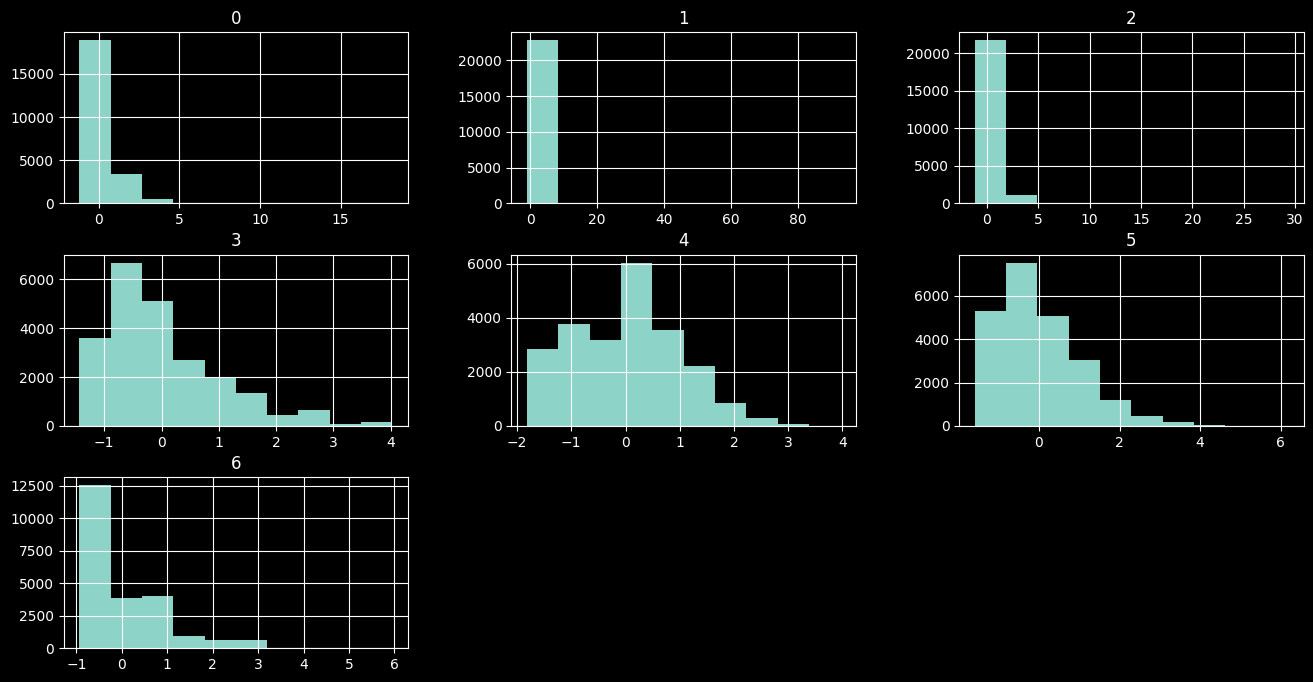

---
<font color=green>Q28:</font>
<br><font color='green'>
Concatenate `df_train_features_rest` with your scaled dataframe of numerical features `df_train_features_numvars_std` to get the final dataframe `df_train_features_processed`. Same for the test data as shown in the figure below.
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1VgznTzwgu32QTb6bjxdDzvu8gF5PyEvt"></center>

---
<font color=green>Q29:</font>
<br><font color='green'>
Show the first 5 rows of the new dataset
</font>

---

,0,1,2,3,4,5,6,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,category_income_C,category_income_B,category_income_A
0,-0.583482,-0.859258,0.807435,-0.723620,-1.017908,2.714190,-0.935244,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.426898,-0.005024,1.055187,-0.882098,0.392830,-1.030511,-0.443013,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0.042855,-0.653114,-1.174582,0.068774,0.600387,2.339719,1.033682,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,0.042855,-0.746816,-1.174582,-1.357534,0.801457,-1.030511,0.541451,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,-0.583482,-0.247072,0.807435,-0.406662,0.224190,-0.281571,-0.689129,0,0,1,...,1,0,0,0,0,0,0,1,0,0


---
<font color=green>Q30:</font>
<br><font color='green'>
What are the shapes of `df_train_features_processed`, `df_train_targets`, `df_test_features_processed` and `df_test_targets`
</font>

---

(22807, 25)

---
<font color=green>Q31:</font>
<br><font color='green'>
Convert the aforementioned dataframes into `numpy` arrays to get `X_train`, `X_test`, `y_train`, `y_test`.
</font>

---

# 4. Fine Tuning a Supervised Model

### 4.1 Evaluation Metrics

First, let's start by a review of the different evaluation metrics

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1SbB_CEcOCblu1sUwzGAOwn5oQRQGEQxS"></center>

The F1 score is calculated as follows: 

$$
\text{F1} = 2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

---
<font color=green>Q32:</font>
<br><font color='green'>
What is the distribution of the targets `loan_status` ?
</font>

---

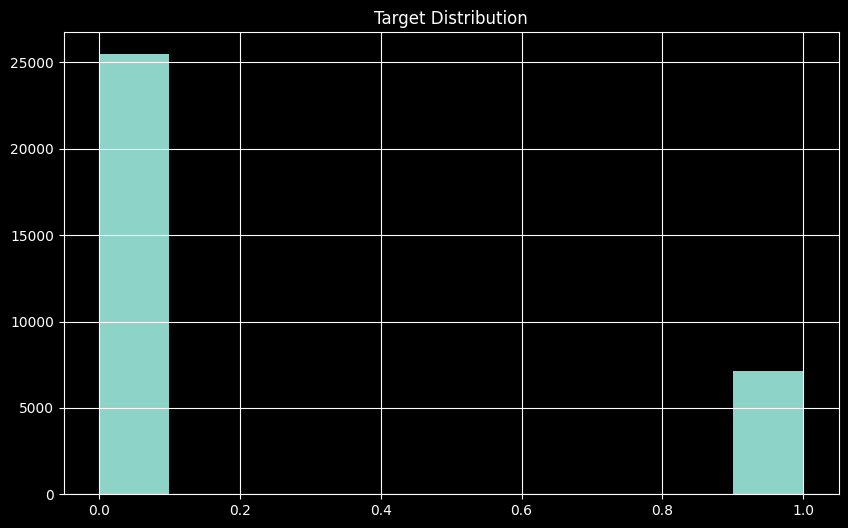

---
<font color=green>Q33:</font>
<br><font color='green'>
Which of the two errors is the most dangerous one for the credit problem ? 
</font>

---

---
...

---

A brief review of Cross Validation:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1TQfP49ZaOoAq4Egt0NuIsWYLHb8Maris"></center>

---
<font color=green>Q34:</font>
<br><font color='green'>
Using `cross_val_score` from `sklearn.model_selection`, write a function that takes as inputs the **classifier**, the **training features** and the **training targets**. The function should output the distribution (the mean and the std) of the following performance measures using cross validation (with K=5). 

* Presicion
* Recall
* f1 score
* auc
* accuracy
</font>

---

In [ ]:
# Import module 
from sklearn.model_selection import cross_val_score
# Cross Validation to test and anticipate overfitting problem
def crossvalidate(clf, X, y):
    precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
    recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
    f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
    roc_auc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
    accuracy = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std()))
    print("Cross Validation Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std()))
    print("Cross Validation f1 score: %0.2f (+/- %0.2f)" % (f1.mean(), f1.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (roc_auc.mean(), roc_auc.std()))
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std()))

---
<font color=green>Q35:</font>
<br><font color='green'>
Using `confusion_matrix` from `sklearn.metrics`, write a function that takes as inputs `y_test` and `y_hat` (vector of 0-1). The function should output a plot of the confusion matrix on the test set. 
</font>

---

In [ ]:
# Import module
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_hat):
  fig = plt.figure(figsize=(10, 8))
  g = sns.heatmap(confusion_matrix(y_test, y_hat),
              annot=True,
              fmt="0.0f")
  g.set_xlabel("Predicted")
  g.set_ylabel("Actual")
  g.set_title("Confusion Matrix on the test set")
  plt.show()



### 4.2 Fine Tuning Random Forest

Brief review of Hyperparameters Optimization:

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1j93wPCK9TyV0oi_kj-UhijNJTLafH4fa"></center>

We would like to tune the following hyperparameters:

* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* bootstrap = method for sampling data points (with or without replacement)

---
<font color=green>Q36:</font>
<br><font color='green'>
Define a dictionary called `random_grid` which maps each of the hyperparameters to a list of possibilities. Example:
* "n_estimators" : [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
* "max_features" : ["auto", "sqrt"]
* "max_depth" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
* "bootstrap" : [True, False]
</font>

---

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200, 250, 300, 350, 400]}


---
<font color=green>Q37:</font>
<br><font color='green'>
Using `RandomizedSearchCV` from `sklearn.model_selection` and `RandomForestClassifier` from `sklearn.ensemble`, find the best combination of hyperparameters among 20 possibilities.

</font>

---

In [ ]:
# Import Modules 


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores


# Fit the random search model


Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 250, 300, 350,
                                                         400]},
                   random_state=42, scoring='f1', verbose=2)

---
<font color=green>Q38:</font>
<br><font color='green'>
What are the hyperparameters of the best model `rf_best`?

</font>

---

RandomForestClassifier(max_depth=60, n_estimators=250, random_state=42)

---
<font color=green>Q39:</font>
<br><font color='green'>
Using `classification_report` from `sklearn.metrics`, display the different performance measures and the confusion matrix for the "optimal" model `rf_best`. 
</font>

---

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7652
           1       0.95      0.73      0.82      2122

    accuracy                           0.93      9774
   macro avg       0.94      0.86      0.89      9774
weighted avg       0.93      0.93      0.93      9774



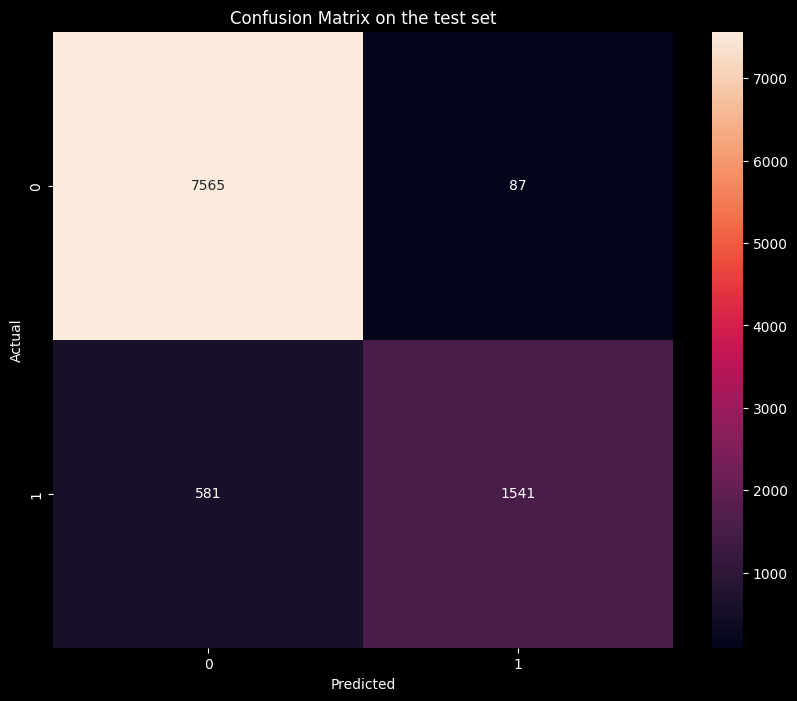

In [ ]:
# Evaluation performances


# Confusion Matrix


# 5. Adjusting the threshold

### 5.1 A small review



As explained in Lecture 1, the AUC is defined as the area under the curve, i.e, the area between the curve and the x-axis. 

* Let us consider a dataset $\mathcal{S} = \{ (x_1, y_1), \dots, (x_n, y_n) \}$ where $\forall i \in \{1, \dots, n\} \quad x_i \in \mathbb{R}^d, \ y_i \in \{0, 1\} \}$

* A classification algorithm (like Random Forest), trained on $\mathcal{S}$, maps each new obersvation $x^* \in \mathbb{R}^d$ to a score $\hat{p}(x^*) \in [0, 1]$ signifying the algorithm's confidence that the label of $x^*$ is $y^* = 1$. 


* Let us split the training feature vectors  $\{(x_i)\}_{1 \leq i \leq n}$ into two groups:
  * A group $\mathcal{G}_+$ of feature vectors associated with the positive label.  
  * A group $\mathcal{G}_-$ of feature vectors associated with the negative label.

* We can then represent two distribution of scores: 
  * A distribution of the scores $\hat{p}(x)$ for each $x \in \mathcal{G}_+$ 
  * A distribution of the scores $\hat{p}(x)$ for each $x \in \mathcal{G}_-$ 

* The figure below summarizes the process described. 

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=17AynSe1QDaiZR-_9FpVQMfOzKRdR_Lfi"></center>

* Let us represent the two distributions in one figure: 

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1tKSqfs1ITKikr8F4oaRSs6t2HLN0hIIf"></center>


* The **AUC** can be interpreted as a measure of the quality of seperation between the aforementioned distributions. 

* Mathematically speaking, the **AUC** gives the probability that the classifier gives a higher score to a positive sample than to a negative sample. (you can read the proof in the [optional reading](https://colab.research.google.com/drive/1gcbB3-3Y6AfohDFJYKmFPF2G-4EIPDTi?usp=sharing)). 




* The method `rf_best.predict_proba()` maps each element $x$ to a prediction (or a score) $p(x) \in [0, 1]$ reflecting the confidence of the classifier in assigning the target $y=1$ to the feature vector $x$. 


<center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1znqNbk_1GLWeTgxf3PU0HcGg1r1L-uLo"></center>


* In order to convert the continuous prediciton $p(x)$ into a binary prediction $\hat{y} \in \{0, 1 \}$, we need to choose a **threshold** above which we assign the positive label.

* The default threshold is 0.5 and the method used to map $x$ to a binary output with this default threshold 0.5 is `rf_best.predict()`

### 5.2 Adjusting the probability threshold

**Our objective in this section is to adjust the threshold in order to match a desired recall**

In order to plot the ROC curve, you will have to install `plot_metric` using the following command line:

```
!pip install plot_metric
```

In [ ]:
!pip install plot_metric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---
<font color=green>Q40:</font>
<br><font color='green'>
Plot the ROC curve of the best model `rf_best` using `BinaryClassification` from `plot_metric.functions`
</font>

---


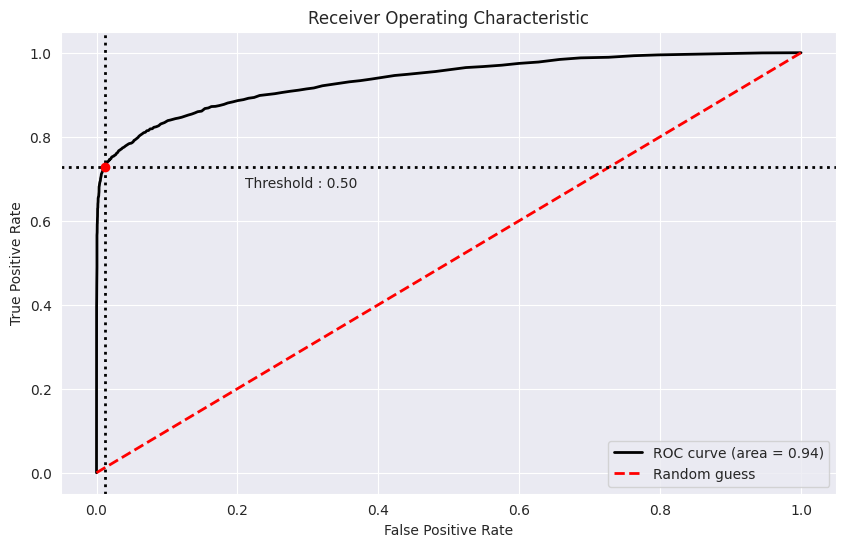

In [ ]:
# Import module
from plot_metric.functions import BinaryClassification

# Plot the ROC curve


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7652
           1       0.95      0.73      0.82      2122

    accuracy                           0.93      9774
   macro avg       0.94      0.86      0.89      9774
weighted avg       0.93      0.93      0.93      9774



---
<font color=green>Q41:</font>
<br><font color='green'>
Let us fix an objective recall of 0.8. By decreasing the threshold progressively from 1 to 0, determine the maximum threshold for which we can have a recall of 0.8, called `best_threshold`
</font>

---


The best Threshold is 0.28...The best recall is 0.8034872761545712


---
<font color=green>Q42:</font>
<br><font color='green'>
Plot the ROC curve and show the point with the coordinated (FPR(best_threshold), TPR(best_treshold)). 
</font>

---

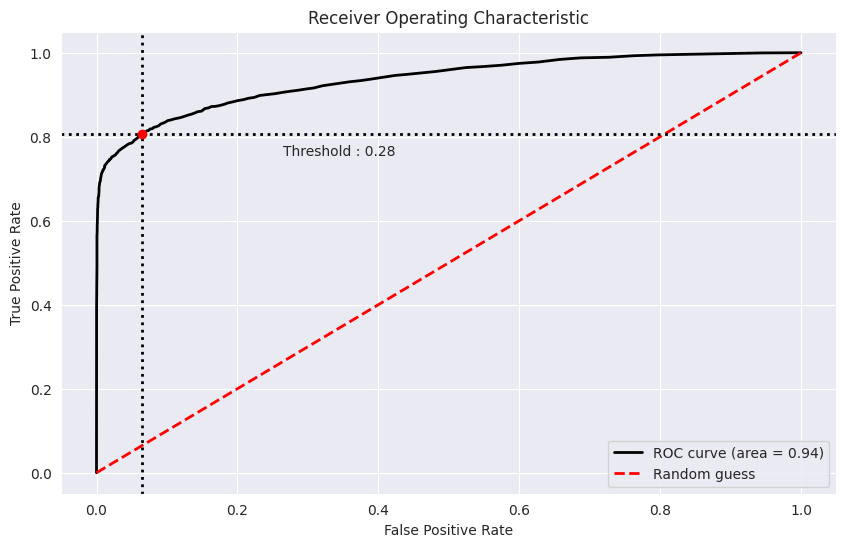

In [ ]:
# let's use another probability threshold so that we can get to the elbow position in the above curve


---
<font color=green>Q43:</font>
<br><font color='green'>
Plot the confusion matrix associated with `best_threshold`
</font>

---


In [ ]:
# Calculate the prediction scores y_hat_proba associated with X_test


In [ ]:
# Calculate the binary prediction y_hat associated with the threshold th


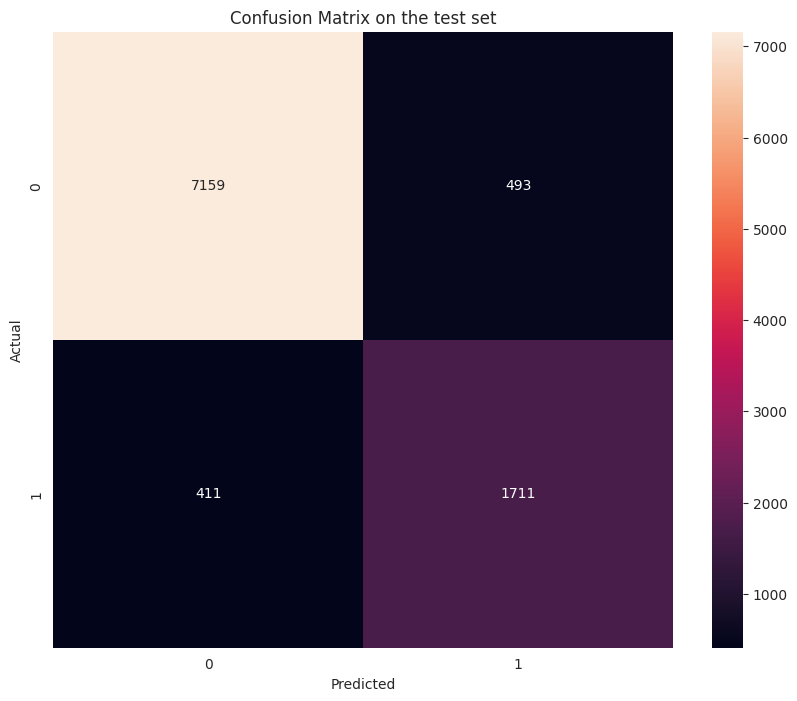

In [ ]:
# plot the confusion matrix


---
<font color=green>Q44:</font>
<br><font color='green'>
Print the evaluation metrics associated with `best_threshold`
</font>

---
 

In [ ]:
# print the classification report


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7652
           1       0.78      0.81      0.79      2122

    accuracy                           0.91      9774
   macro avg       0.86      0.87      0.87      9774
weighted avg       0.91      0.91      0.91      9774



# Wrap-up

During this session we learned:
* How to load and visualize a dataset.
* How to process categorical and numerical features.
* What are the most suitable evaluation metrics in the case of an imbalanced dataset, especially the recall and the AUC.
* How to adjust the probability threshold so that it matches the objective error of a business problem.

# Optional Exercise: Resampling techniques

* The main problem when we train a model using an imbalanced dataset is that it results in a biased classifier towards the majority class. 

* There are two ways to overcome this bias problem:
  * **Undersampling**: In this case, we randomly select as many observations of the majority class $\mathcal{G}_-$ as we have for the minority class $\mathcal{G}_+$. (See figure below)
  
  <center><img width=“500" src = "https://drive.google.com/uc?export=view&id=106_U8l014dk7LybyoPpUEiLlABfeWbhZ"></center>

  * **Oversampling**: In this case, we prefer to have more elements from the minority class $\mathcal{G}_+$. Hence, we either create duplicates of the minority class or create synthetic datapoints so that we reach $|\mathcal{G}_-|$ samples (where $|F|$ denotes the number of elements of $F$). One way of creating synthetic data points is called the **SMOTE** (Synthetic Minority Oversampling Technique). The method is described in [Synthetic Minority Over-sampling Technique](https://arxiv.org/pdf/1106.1813.pdf) and can be summarized as follows:
    * First, a random example $x_1$ is chosed from the minority class $\mathcal{G}_+$. 
    * Then, we find the k nearest neighbors for that example (typically $k=5$).
    * We randomly select one of these k neighbors, let's call it $x_2$.
    * The synthetic instances are generated as a convex combination of the two instances $x_1$ and $x_2$. 

  <center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1j2EGBKoXKdI66mynmgdIYlRT2HWpdhrQ"></center>


---
<font color=green>Optional questions:</font>
<br><font color='green'>
* Finetune the model after using the SMOTE oversampling method. 
* Try different supervised models to improve the results. 
</font>

---


# Contact

If you have any question regarding this notebook, do not hesitate to contact: h.madmoun@imperial.ac.uk

